In [94]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [95]:
user_behavior = pd.read_csv("data\\steam-200k.csv", header=None).drop(columns=4)
user_behavior.columns = ["user_id", "game_name", "behavior", "amount"]

# User Based (using just "play" behavior)

In [96]:
# get only user plays
user_plays = user_behavior[user_behavior["behavior"] == "play"].drop(columns="behavior")

In [97]:
# make sure each user only has one play amount for each game
user_plays = user_plays.groupby(["user_id", "game_name"]).sum().reset_index()

In [98]:
# only keep play times of at least 1 hour
user_plays = user_plays[user_plays['amount'] >= 1]

In [99]:
users_sorted = user_plays.groupby("user_id").count().reset_index().sort_values("amount", ascending=False)
games_sorted = user_plays.groupby("game_name").count().reset_index().sort_values("amount", ascending=False)

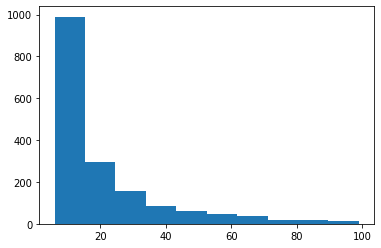

In [100]:
plt.hist(users_sorted['amount'][(users_sorted['amount'] > 5) & (users_sorted['amount'] < 100)])
plt.show()

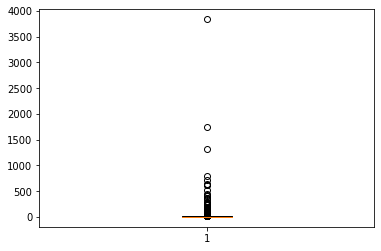

In [101]:
plt.boxplot(games_sorted['amount'])
plt.show()

In [102]:
print(user_plays.merge(users_sorted[users_sorted['amount'] >= 5]['user_id'], on='user_id').shape)
print(user_plays.shape)

(42915, 3)
(53694, 3)


In [103]:
games_sorted['amount'][(games_sorted['amount'] > 1000)]

781     3835
2561    1753
567     1324
Name: amount, dtype: int64

In [104]:
print(user_plays.merge(games_sorted[games_sorted['amount'] <= 1000]['game_name']).shape)
print(user_plays.shape)

(46782, 3)
(53694, 3)


In [105]:
games_sorted[(games_sorted['amount'] > 1000)]['game_name'].tolist()

['Dota 2', 'Team Fortress 2', 'Counter-Strike Global Offensive']

In [106]:
user_plays

,user_id,game_name,amount
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Deus Ex Human Revolution,62.0
4,5250,Portal 2,13.6
6,76767,Age of Empires II HD Edition,13.1
...,...,...,...
70468,309404240,Mitos.is The Game,2.2
70469,309404240,Team Fortress 2,2.2
70471,309404240,Unturned,13.0
70473,309554670,Mitos.is The Game,5.9


In [107]:
user_plays = user_plays.merge(user_plays.groupby('user_id').agg({'amount':'min'}).reset_index(), on='user_id')
user_plays = user_plays.merge(user_plays.groupby('user_id').agg({'amount_x':'max'}).reset_index(), on='user_id')

In [108]:
user_plays.columns = ['user_id', 'game_name', 'amount', 'min', 'max']
user_plays['norm_amount'] = (user_plays['amount'] - user_plays['min'].apply(np.floor)) / (user_plays['max'] - user_plays['min'].apply(np.floor)) 

In [111]:
user_plays.drop(columns=['min', 'max'])

,user_id,game_name,amount,norm_amount
0,5250,Alien Swarm,4.9,0.006429
1,5250,Cities Skylines,144.0,1.000000
2,5250,Deus Ex Human Revolution,62.0,0.414286
3,5250,Portal 2,13.6,0.068571
4,76767,Age of Empires II HD Edition,13.1,0.033242
...,...,...,...,...
53689,309404240,Mitos.is The Game,2.2,0.018182
53690,309404240,Team Fortress 2,2.2,0.018182
53691,309404240,Unturned,13.0,1.000000
53692,309554670,Mitos.is The Game,5.9,1.000000
